In [3]:
import pandas as pd
df = pd.read_csv('wineqt.csv')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
np.random.seed(42)
df = pd.DataFrame({
    'fixed acidity': np.random.uniform(4, 15, 100),
    'volatile acidity': np.random.uniform(0, 1.5, 100),
    'citric acid': np.random.uniform(0, 1, 100),
    'residual sugar': np.random.uniform(0.9, 15, 100),
    'chlorides': np.random.uniform(0.012, 0.2, 100),
    'free sulfur dioxide': np.random.uniform(1, 72, 100),
    'total sulfur dioxide': np.random.uniform(6, 289, 100),
    'density': np.random.uniform(0.990, 1.004, 100),
    'pH': np.random.uniform(2.9, 3.9, 100),
    'sulphates': np.random.uniform(0.3, 2.0, 100),
    'alcohol': np.random.uniform(8, 14, 100),
    'quality': np.random.choice(['low', 'medium', 'high'], 100)
})

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
le.classes_

array(['high', 'low', 'medium'], dtype=object)

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1 9 2]
 [1 2 2]
 [0 2 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       0.15      0.40      0.22         5
           2       0.20      0.33      0.25         3

    accuracy                           0.20        20
   macro avg       0.28      0.27      0.21        20
weighted avg       0.37      0.20      0.18        20

Accuracy Score: 0.2


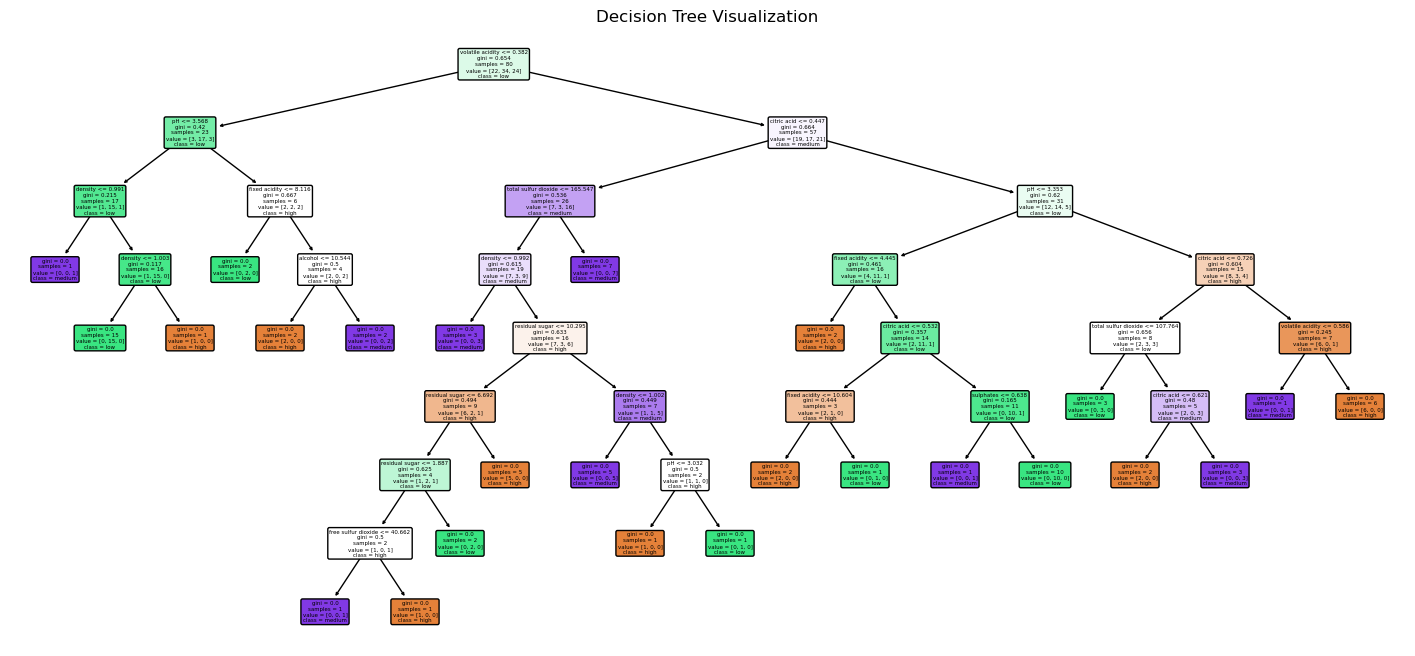

In [12]:
plt.figure(figsize=(18, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

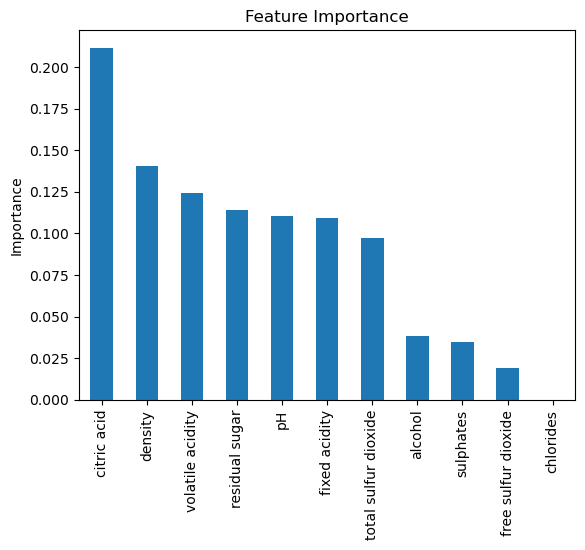

In [13]:
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance')
plt.show()